<a href="https://colab.research.google.com/github/denisich2001/DataScienceLabs/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_1_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1 
# кластеризация

Подключаем библиотеки и настраиваем параметры графиков

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(14,8)

Генерируем датасет для будущей кластеризации с 10 центрами и 100 элементами

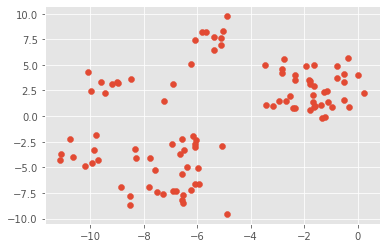

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, random_state=1, centers = 10)

plt.scatter(X[:,0], X[:,1])

# Метод k-means

Подбираем оптимальное количество кластеров

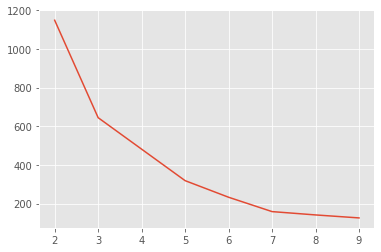

In [ ]:
from sklearn.cluster import KMeans

criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=4)
  kmeansModel.fit(X)
  criteries.append(kmeansModel.inertia_)
plt.plot(range(2,10), criteries)

Видим, что оптимальное количество кластеров - 7. Обучаем модель


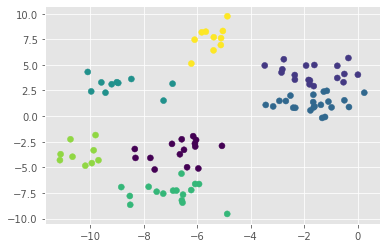

In [ ]:
kmeansModel = KMeans(n_clusters=7)
kmeansModel.fit(X)

plt.scatter(X[:,0],X[:,1], c = kmeansModel.labels_)

# Метод DBSCAN

Подберем параметры для модели DBSCAN

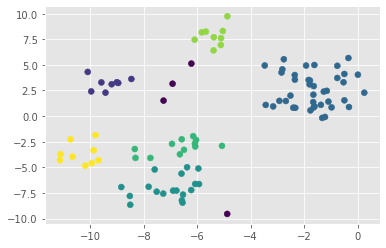

In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = 1.5, min_samples = 6)
pred_result = clustering.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c = pred_result)

# Данные файла Mail_Customers.csv

Загружаем данные

In [ ]:
file = pd.read_csv("Mall_Customers.csv")
file

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Готовим данные к обработке

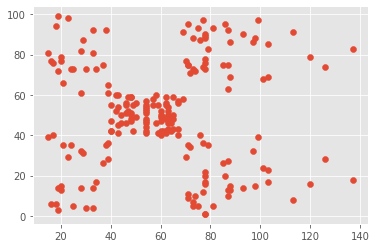

In [ ]:
data = file[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[::].values
plt.scatter(data[:,0], data[:,1])
data[]

**Используем метод k-means**

Подбираем количество кластеров методом локтя

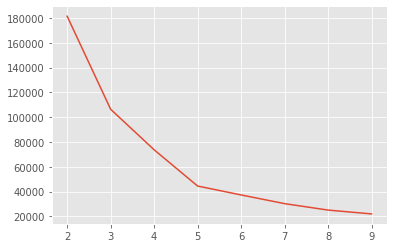

In [ ]:
criteries = []
for k in range(2,10):
  kmeansModel=KMeans(n_clusters=k, random_state=4)
  kmeansModel.fit(data)
  criteries.append(kmeansModel.inertia_)
plt.plot(range(2,10), criteries)

Оптимальное количество кластеров - 5. Обучаем модель

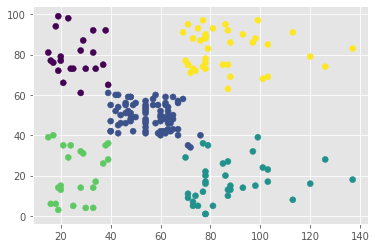

In [ ]:
kmeansModel = KMeans(n_clusters = 5)
kmeansModel.fit(data)
plt.scatter(data[:,0], data[:,1], c = kmeansModel.labels_)

**Используем DBSCAN**

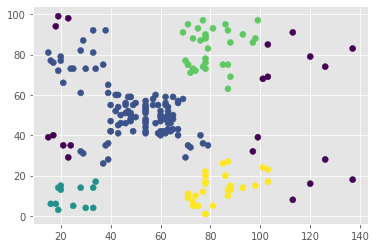

In [ ]:
clustering = DBSCAN(eps = 13, min_samples = 10)
pred_result = clustering.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = pred_result)